<h1>Data and Features Analysis

In [1]:
import pandas as pd
data_train=pd.read_csv("train.csv")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
X        450 non-null int64
Y        450 non-null int64
month    450 non-null object
day      450 non-null object
FFMC     450 non-null float64
DMC      450 non-null float64
DC       450 non-null float64
ISI      450 non-null float64
temp     450 non-null float64
RH       450 non-null int64
wind     450 non-null float64
rain     450 non-null float64
area     450 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 45.8+ KB


<h4>Month and date need to be mapped

In [2]:
data_train_update=pd.DataFrame({"X":[],"Y":[],"month":[],"day":[],"FFMC":[],"DMC":[],"DC":[],"ISI":[],"temp":[],"RH":[],"wind":[],"rain":[],"area":[]})
for key in data_train:
    if key != "month" and key != "day":
        data_train_update[key]=data_train[key]
mon_dict={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
day_dict={"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
for i in range(0,450):
    data_train_update["month"][i]=mon_dict[data_train["month"][i]]
    data_train_update["day"][i]=day_dict[data_train["day"][i]]

/home/lokesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/lokesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3]:
data_train_update.describe()

,DC,DMC,FFMC,ISI,RH,X,Y,area,day,month,rain,temp,wind
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,548.043556,112.545333,90.711556,9.131111,44.580000,4.637778,4.306667,10.145489,4.235556,7.406667,0.024889,19.018889,4.053778
std,249.387800,66.095553,5.494715,4.646632,16.254081,2.337816,1.233966,43.300743,2.064134,2.286096,0.317146,5.860120,1.750621
min,7.900000,1.100000,18.700000,0.000000,15.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.200000,0.900000
25%,438.500000,68.875000,90.200000,6.500000,33.000000,3.000000,4.000000,0.000000,2.000000,7.000000,0.000000,15.700000,2.700000
50%,658.200000,108.150000,91.600000,8.400000,42.000000,4.000000,4.000000,0.520000,5.000000,8.000000,0.000000,19.400000,4.000000
75%,715.100000,142.400000,92.900000,10.950000,54.000000,7.000000,5.000000,6.345000,6.000000,9.000000,0.000000,22.875000,4.900000
max,860.600000,291.300000,96.200000,56.100000,100.000000,9.000000,9.000000,746.280000,7.000000,12.000000,6.400000,33.300000,9.400000


<h3>Here area's maximum value is 746.28 whereas mean value is 10.145, which is suspicious

In [4]:
data_train_update.head()

,DC,DMC,FFMC,ISI,RH,X,Y,area,day,month,rain,temp,wind
0,94.3,26.2,86.2,5.1,51,7,5,0.0,5.0,3.0,0.0,8.2,6.7
1,669.1,35.4,90.6,6.7,33,7,4,0.0,2.0,10.0,0.0,18.0,0.9
2,77.5,33.3,91.7,9.0,97,8,6,0.0,5.0,3.0,0.2,8.3,4.0
3,488.0,85.3,92.3,14.7,29,8,6,0.0,7.0,8.0,0.0,22.2,5.4
4,495.6,88.9,92.3,8.5,27,8,6,0.0,1.0,8.0,0.0,24.1,3.1


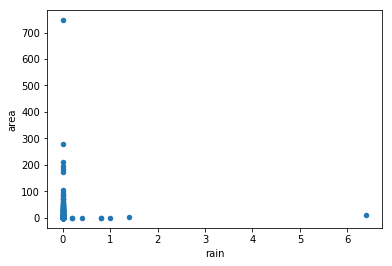

In [6]:
%matplotlib inline
data_train_update.plot(kind='scatter',x='rain',y='area')

<h4>There are outliers in data

In [7]:
test=data_train_update[data_train_update.area<=300]

In [8]:
test=test[test.rain!=6.40000]

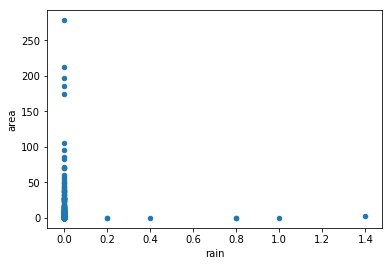

In [9]:
%matplotlib inline
test.plot(kind='scatter',x='rain',y='area')

<h4>Removed outliers

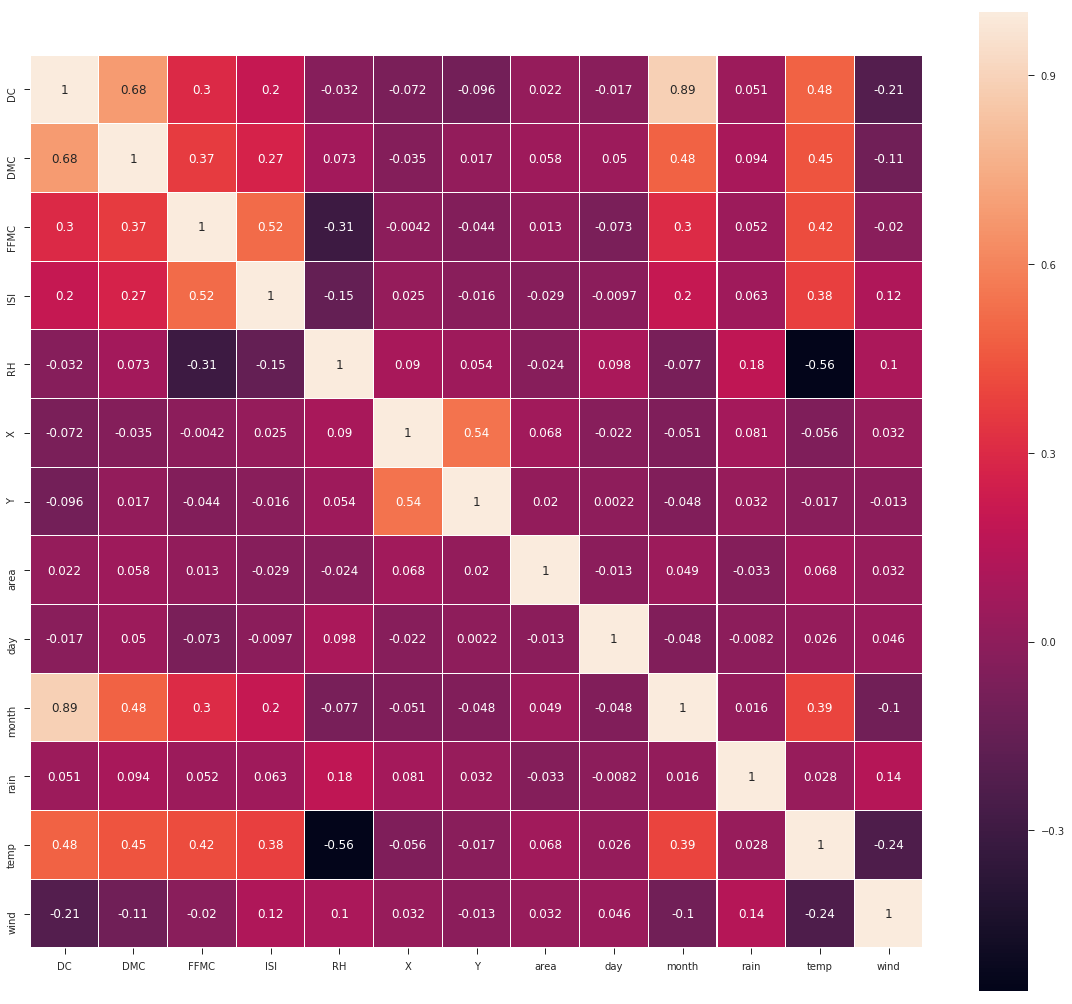

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(20,18))
sns.heatmap(test.astype(float).corr(),linewidths=0.1,square=True,linecolor='white',annot=True)
plt.show()

<h4>Applying heatmap without taking log

In [11]:
import math
data_train_update["area"]=data_train_update["area"].apply(lambda x:0.80 if x==0 else math.log(x)/math.log(2))

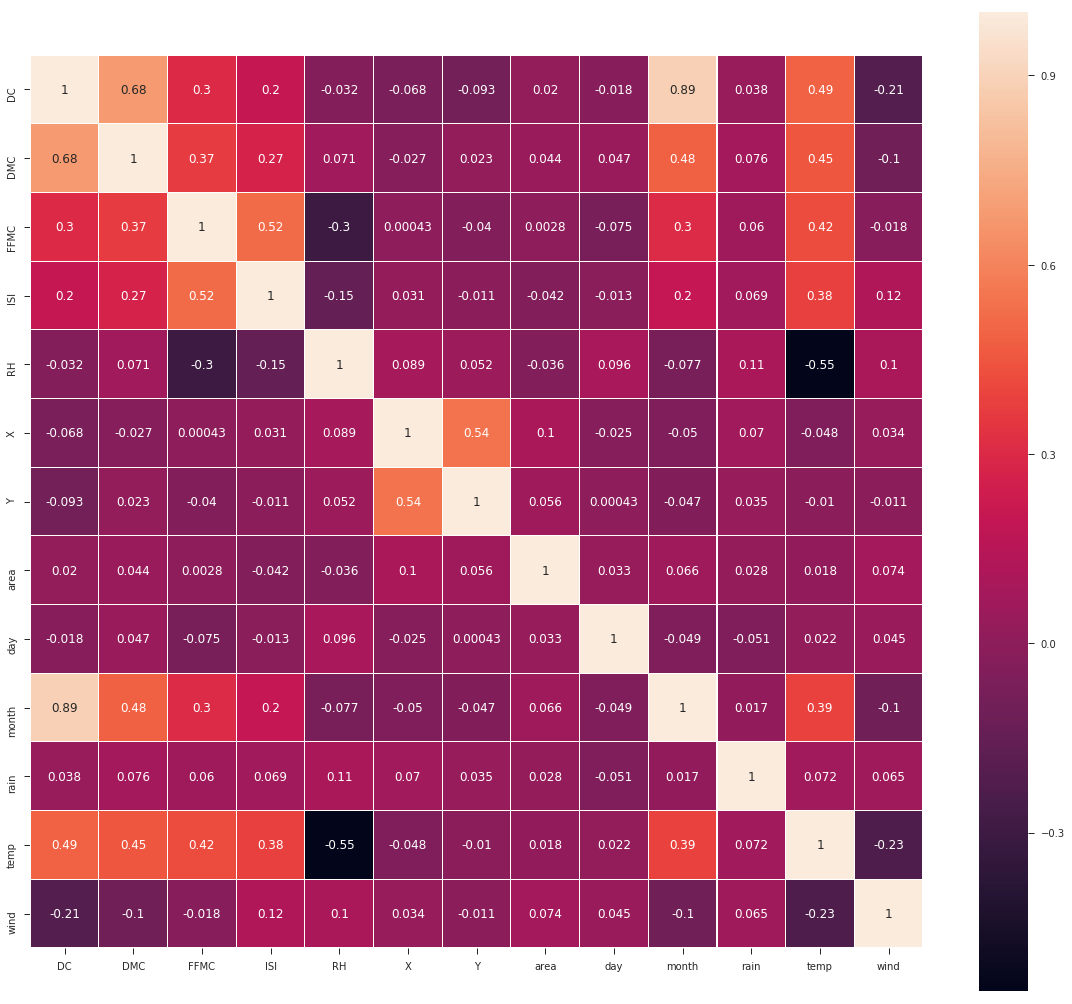

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(20,18))
sns.heatmap(data_train_update.astype(float).corr(),linewidths=0.1,square=True,linecolor='white',annot=True)
plt.show()

<h4>Improved results after converting area feature in logairthmic scale

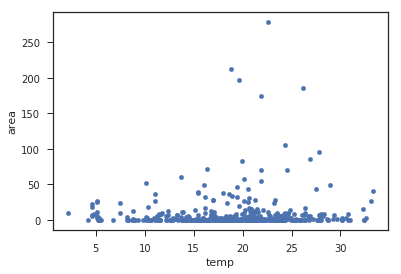

In [13]:
%matplotlib inline
test.plot(kind='scatter',x='temp',y='area')

<h4>This shows there are still outliers as data is mostly upto area 100, so removing them all

In [14]:
test=test[test.area<=100]

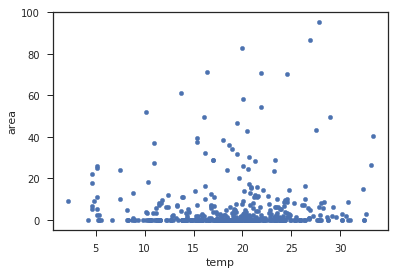

In [15]:
%matplotlib inline
test.plot(kind='scatter',x='temp',y='area')

<h4>Improved results

In [ ]:
data_test=pd.read_csv('test.csv')
data_test.replace({"month":mon_dict},inplace=True)
data_test.replace({"day":day_dict},inplace=True)

In [ ]:
ans=pd.DataFrame({"Id":[],"area":[]})
ans["Id"]=data_test["Id"]
data_test.drop("Id",axis="columns",inplace=True)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR
svmr=SVR(kernel='rbf', C=1e3, gamma=0.1)
svmr.fit(features,labels)
pred=svmr.predict(data_test)

In [ ]:
pred=2**pred

In [ ]:
pred

In [ ]:
ans["area"]=pred
ans.to_csv('sampleSubmission.csv')

<h4>Now our data is ready